In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import numpy as np

train_samples = 10000

X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

def expand(i):
    res = [0 for _ in range(0, 10)]
    res[i] = 1 
    return res

y = [expand(int(v)) for v in y]
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.8, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [2]:
import sys
import os

sys.path.append(os.path.abspath(".."))

import src.FFNN as ffnn
from src.utils import plot_training_results

# Activation

## Sigmoid

In [3]:

layer_size = [784, 64, 64, 64, 10]
activations = ["sigmoid", "sigmoid", "sigmoid", "softmax"]

sigmoid = ffnn.FFNN(layer_sizes=layer_size, activations=activations, loss="mse", weight_initializer="normal", weight_init_args={"seed": 73})
plot_sigmoid = sigmoid.fit(X_train, y_train, 20, 0.1, 50, True, X_val, y_val)


Epoch 1/20, Loss: 0.9015, Val_loss: 0.9002
Epoch 2/20, Loss: 0.8996, Val_loss: 0.8994
Epoch 3/20, Loss: 0.8992, Val_loss: 0.8990
Epoch 4/20, Loss: 0.8988, Val_loss: 0.8985
Epoch 5/20, Loss: 0.8982, Val_loss: 0.8978
Epoch 6/20, Loss: 0.8973, Val_loss: 0.8966
Epoch 7/20, Loss: 0.8958, Val_loss: 0.8945
Epoch 8/20, Loss: 0.8927, Val_loss: 0.8902
Epoch 9/20, Loss: 0.8861, Val_loss: 0.8803
Epoch 10/20, Loss: 0.8695, Val_loss: 0.8547
Epoch 11/20, Loss: 0.8334, Val_loss: 0.8141
Epoch 12/20, Loss: 0.8000, Val_loss: 0.7883
Epoch 13/20, Loss: 0.7765, Val_loss: 0.7634
Epoch 14/20, Loss: 0.7493, Val_loss: 0.7317
Epoch 15/20, Loss: 0.7186, Val_loss: 0.7009
Epoch 16/20, Loss: 0.6917, Val_loss: 0.6787
Epoch 17/20, Loss: 0.6714, Val_loss: 0.6602
Epoch 18/20, Loss: 0.6559, Val_loss: 0.6482
Epoch 19/20, Loss: 0.6451, Val_loss: 0.6397
Epoch 20/20, Loss: 0.6334, Val_loss: 0.6282


In [4]:
y_pred = sigmoid.predict(X_test)

y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_test_labels, y_pred_labels)
f1 = f1_score(y_test_labels, y_pred_labels, average="weighted")
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels))

Accuracy: 0.5036
F1-score: 0.4436

Confusion Matrix:
[[671   1   0   5   5   0   0   2   0   1]
 [  2 807   4   3   0   0   0   3   0   1]
 [236  73 241 123  24   0   9   6   0   4]
 [432  15  15 230   3   0   1  13   0   6]
 [ 17   1   0   2 627   0   0   3   0   9]
 [500  17  11  77  24   0   2   0   0   3]
 [497   9  70   4  17   0  92   0   0   0]
 [  3  14   1   1   5   0   0 672   0  14]
 [385  42   9 183  13   0   1   4   0   6]
 [ 14   4   0   4 450   0   0  72   0 185]]

Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.98      0.39       685
           1       0.82      0.98      0.90       820
           2       0.69      0.34      0.45       716
           3       0.36      0.32      0.34       715
           4       0.54      0.95      0.69       659
           5       0.00      0.00      0.00       634
           6       0.88      0.13      0.23       689
           7       0.87      0.95      0.91       710
     

c:\Users\sihom\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sihom\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sihom\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

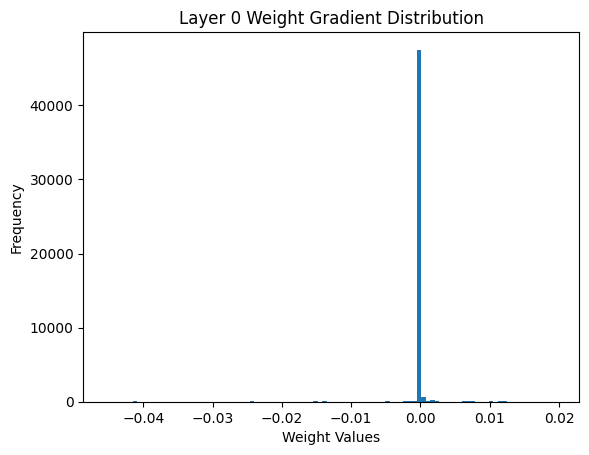

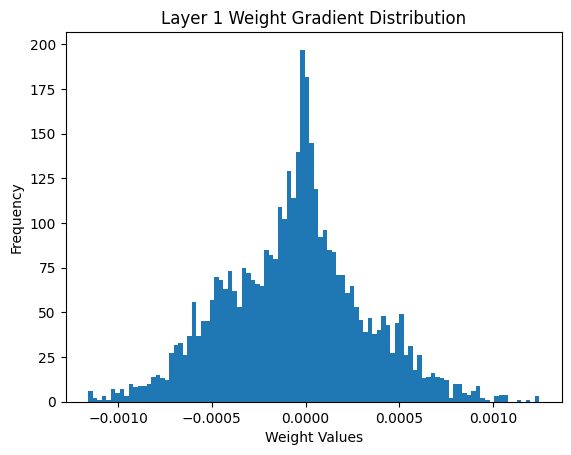

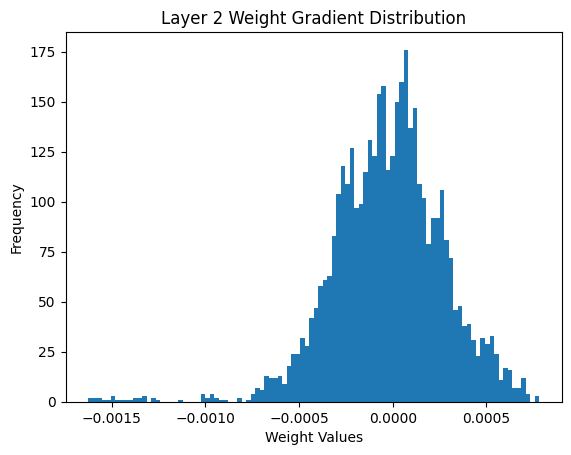

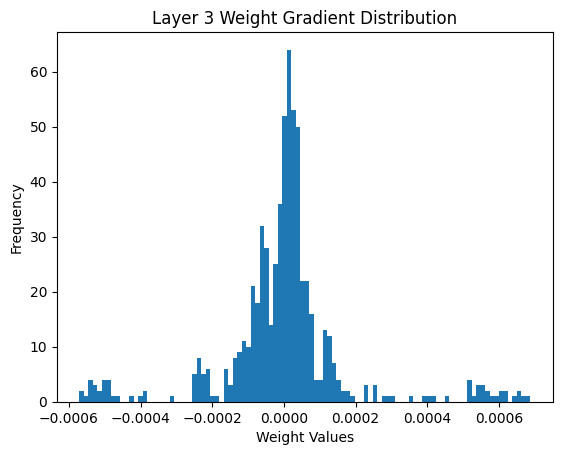

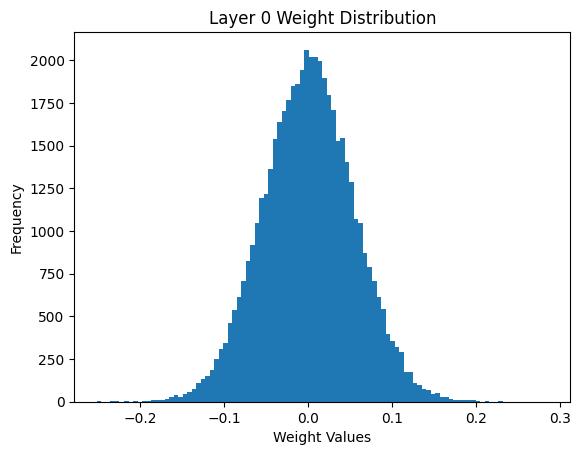

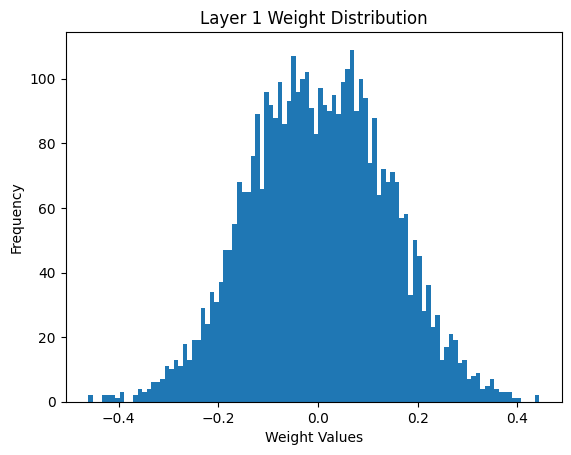

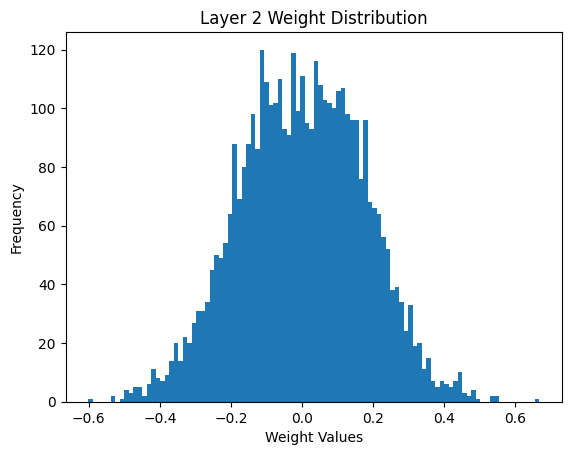

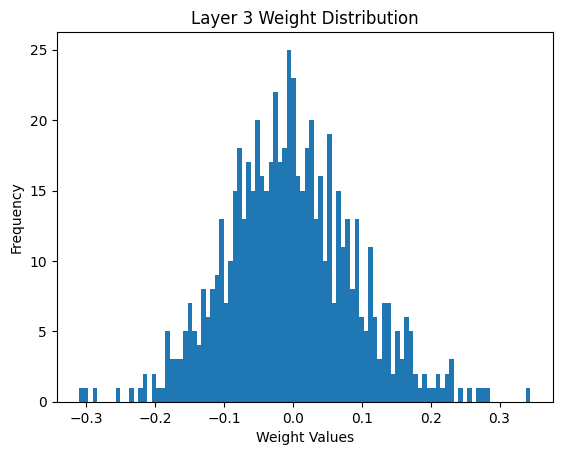

In [5]:
sigmoid.plot_gradient_weight([0,1,2,3])
sigmoid.plot_weight([0,1,2,3])

## ReLU

In [ ]:

layer_size = [784, 64, 64, 64, 10]
activations = ["relu","relu","relu","softmax"]

relu = ffnn.FFNN(layer_sizes=layer_size, activations=activations, loss="mse", weight_initializer="normal", weight_init_args={"seed": 73})
plot_relu = relu.fit(X_train, y_train, 20, 0.1, 50, True, X_val, y_val)


Epoch 1/20, Loss: 0.2137, Val_loss: 0.1108
Epoch 2/20, Loss: 0.1036, Val_loss: 0.0998
Epoch 3/20, Loss: 0.0834, Val_loss: 0.0876
Epoch 4/20, Loss: 0.0738, Val_loss: 0.0788
Epoch 5/20, Loss: 0.0684, Val_loss: 0.0728
Epoch 6/20, Loss: 0.0634, Val_loss: 0.0782
Epoch 7/20, Loss: 0.0589, Val_loss: 0.0703
Epoch 8/20, Loss: 0.0568, Val_loss: 0.0698
Epoch 9/20, Loss: 0.0532, Val_loss: 0.0743
Epoch 10/20, Loss: 0.0522, Val_loss: 0.0725
Epoch 11/20, Loss: 0.0492, Val_loss: 0.0683
Epoch 12/20, Loss: 0.0469, Val_loss: 0.0720
Epoch 13/20, Loss: 0.0441, Val_loss: 0.0644
Epoch 14/20, Loss: 0.0437, Val_loss: 0.0617
Epoch 15/20, Loss: 0.0400, Val_loss: 0.0772
Epoch 16/20, Loss: 0.0423, Val_loss: 0.0833
Epoch 17/20, Loss: 0.0416, Val_loss: 0.0701
Epoch 18/20, Loss: 0.0420, Val_loss: 0.0898
Epoch 19/20, Loss: 0.0382, Val_loss: 0.0652
Epoch 20/20, Loss: 0.0356, Val_loss: 0.0593


In [7]:
y_pred = relu.predict(X_test)

y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_test_labels, y_pred_labels)
f1 = f1_score(y_test_labels, y_pred_labels, average="weighted")
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels))

Accuracy: 0.9644
F1-score: 0.9645

Confusion Matrix:
[[668   0   4   0   2   0   5   1   5   0]
 [  0 803   4   1   0   1   1   3   6   1]
 [  3   3 681   2   7   0   7   2  10   1]
 [  1   2   6 684   1   4   1   4  11   1]
 [  1   0   0   0 641   0   4   2   3   8]
 [  2   1   1  16   1 593   7   1   9   3]
 [  2   0   1   0   3   3 678   0   2   0]
 [  0   3   8   1   2   1   0 689   3   3]
 [  3   4   1   3   1   3   1   2 624   1]
 [  2   2   1   3   8   4   2   7  10 690]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       685
           1       0.98      0.98      0.98       820
           2       0.96      0.95      0.96       716
           3       0.96      0.96      0.96       715
           4       0.96      0.97      0.97       659
           5       0.97      0.94      0.95       634
           6       0.96      0.98      0.97       689
           7       0.97      0.97      0.97       710
     

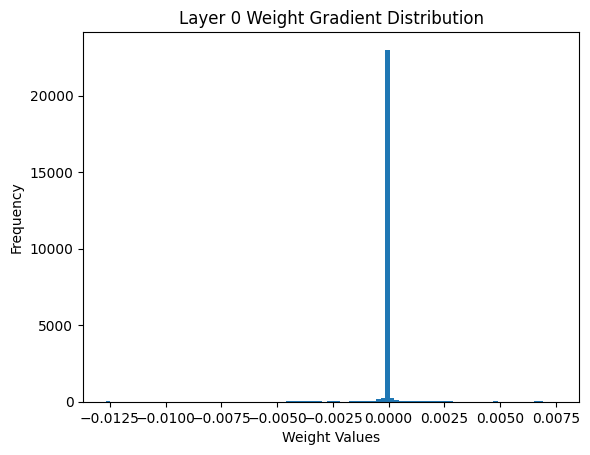

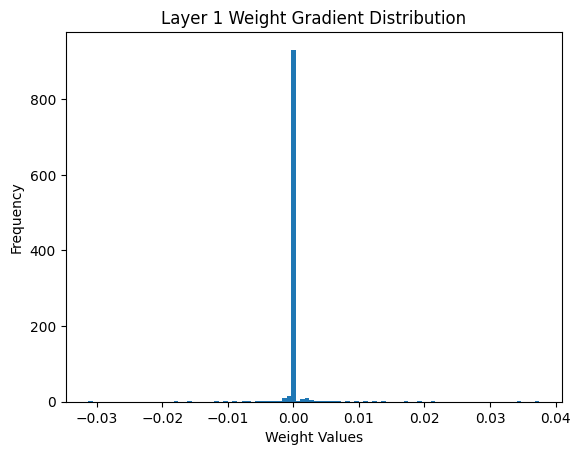

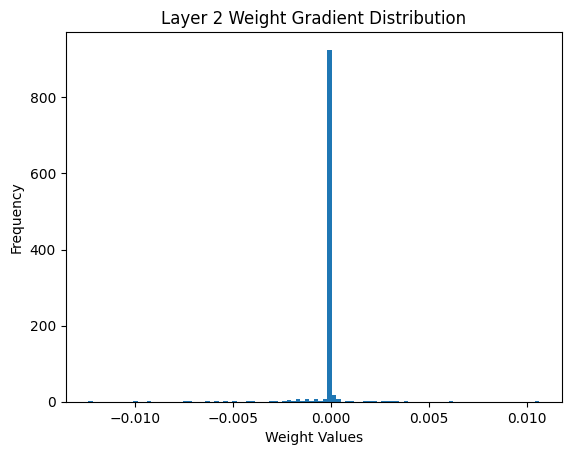

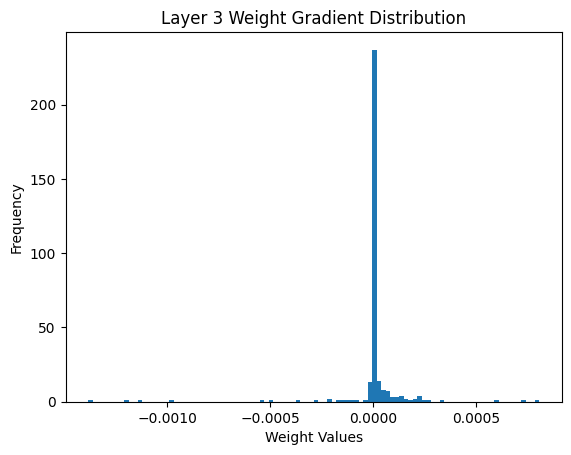

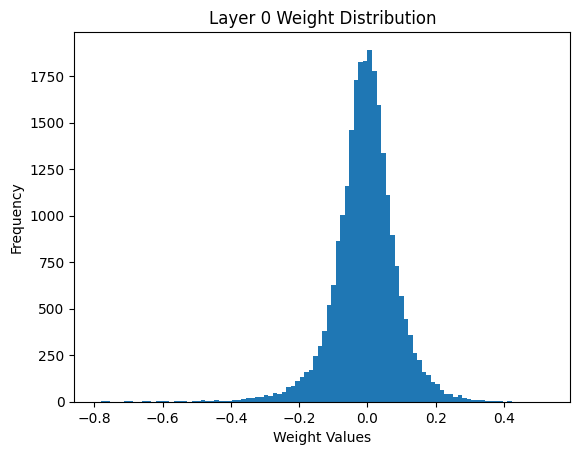

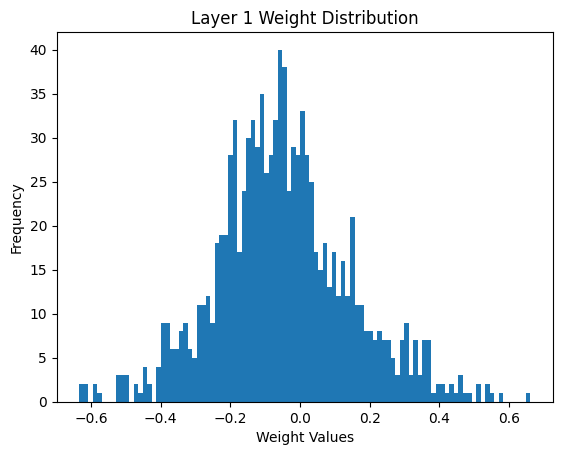

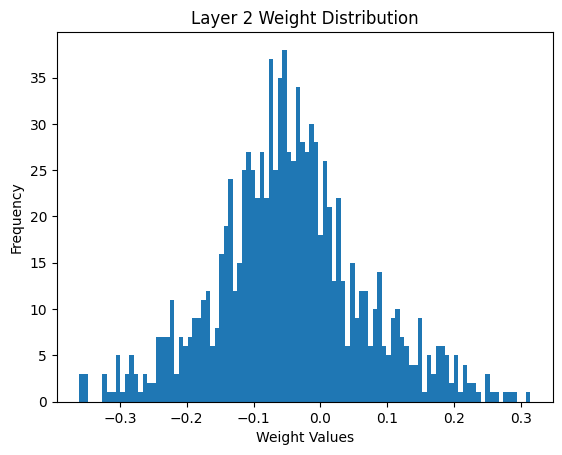

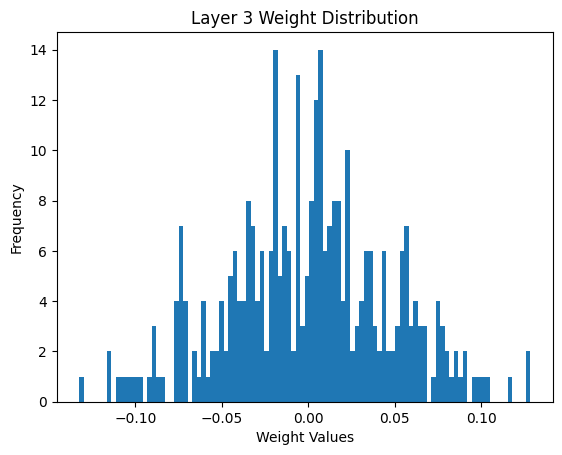

In [8]:
relu.plot_gradient_weight([0,1,2,3])
relu.plot_weight([0,1,2,3])

## Linear

In [ ]:

layer_size = [784, 64, 64, 64, 10]
activations = ["linear","linear","linear","softmax"]

linear = ffnn.FFNN(layer_sizes=layer_size, activations=activations, loss="mse", weight_initializer="normal", weight_init_args={"seed": 73})
plot_linear = linear.fit(X_train, y_train, 20, 0.1, 50, True, X_val, y_val)


Epoch 1/20, Loss: 1.8042, Val_loss: 1.7980
Epoch 2/20, Loss: 1.8043, Val_loss: 1.7980
Epoch 3/20, Loss: 1.8042, Val_loss: 1.7980
Epoch 4/20, Loss: 1.8042, Val_loss: 1.7980
Epoch 5/20, Loss: 1.8042, Val_loss: 1.7980
Epoch 6/20, Loss: 1.7919, Val_loss: 1.7734
Epoch 7/20, Loss: 1.7932, Val_loss: 1.7734
Epoch 8/20, Loss: 1.7932, Val_loss: 1.7734


In [ ]:
y_pred = linear.predict(X_test)

y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_test_labels, y_pred_labels)
f1 = f1_score(y_test_labels, y_pred_labels, average="weighted")
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels))

In [ ]:
linear.plot_gradient_weight([0,1,2,3])
linear.plot_weight([0,1,2,3])

## Tanh

In [ ]:

layer_size = [784, 64, 64, 64, 10]
activations = ["tanh","tanh","tanh","softmax"]

tanh = ffnn.FFNN(layer_sizes=layer_size, activations=activations, loss="mse", weight_initializer="normal", weight_init_args={"seed": 73})
plot_tanh = tanh.fit(X_train, y_train, 20, 0.1, 50, True, X_val, y_val)


Epoch 1/100, Loss: 0.5573, Val_loss: 0.4004
Epoch 2/100, Loss: 0.3691, Val_loss: 0.3463
Epoch 3/100, Loss: 0.3410, Val_loss: 0.3069
Epoch 4/100, Loss: 0.3184, Val_loss: 0.3143
Epoch 5/100, Loss: 0.3148, Val_loss: 0.3051
Epoch 6/100, Loss: 0.3228, Val_loss: 0.3240
Epoch 7/100, Loss: 0.3386, Val_loss: 0.3426
Epoch 8/100, Loss: 0.3435, Val_loss: 0.3232
Epoch 9/100, Loss: 0.3461, Val_loss: 0.3693
Epoch 10/100, Loss: 0.3693, Val_loss: 0.3536
Epoch 11/100, Loss: 0.3771, Val_loss: 0.3655
Epoch 12/100, Loss: 0.3741, Val_loss: 0.3702
Epoch 13/100, Loss: 0.3598, Val_loss: 0.3652
Epoch 14/100, Loss: 0.3266, Val_loss: 0.3371
Epoch 15/100, Loss: 0.3065, Val_loss: 0.3208
Epoch 16/100, Loss: 0.3099, Val_loss: 0.3069
Epoch 17/100, Loss: 0.2908, Val_loss: 0.2945
Epoch 18/100, Loss: 0.2806, Val_loss: 0.2732
Epoch 19/100, Loss: 0.2654, Val_loss: 0.3002
Epoch 20/100, Loss: 0.3010, Val_loss: 0.3098
Epoch 21/100, Loss: 0.2927, Val_loss: 0.2992
Epoch 22/100, Loss: 0.2814, Val_loss: 0.2974
Epoch 23/100, Loss:

In [ ]:
y_pred = tanh.predict(X_test)

y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_test_labels, y_pred_labels)
f1 = f1_score(y_test_labels, y_pred_labels, average="weighted")
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels))

Accuracy: 0.8780
F1-score: 0.8773

Confusion Matrix:
[[636   1   7   5   3   9  10   2   9   3]
 [  0 787  11   8   0   3   0   5   5   1]
 [ 12   5 623  19   7   5  20   8  14   3]
 [  6   9  22 615   0  36   2   8  11   6]
 [  1   7   7   0 585   4   6   5   5  39]
 [ 31   4   4  23   6 519  13   1  24   9]
 [ 13   1   5   0   4  15 649   0   2   0]
 [  4   7  18   3   5   2   0 641   4  26]
 [  4  11  45  43   5  28   4  12 484   7]
 [  7   5   3  12  43   6   1  36   9 607]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       685
           1       0.94      0.96      0.95       820
           2       0.84      0.87      0.85       716
           3       0.84      0.86      0.85       715
           4       0.89      0.89      0.89       659
           5       0.83      0.82      0.82       634
           6       0.92      0.94      0.93       689
           7       0.89      0.90      0.90       710
     

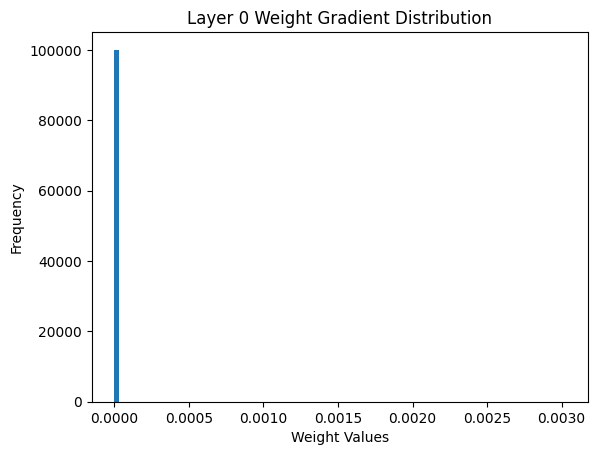

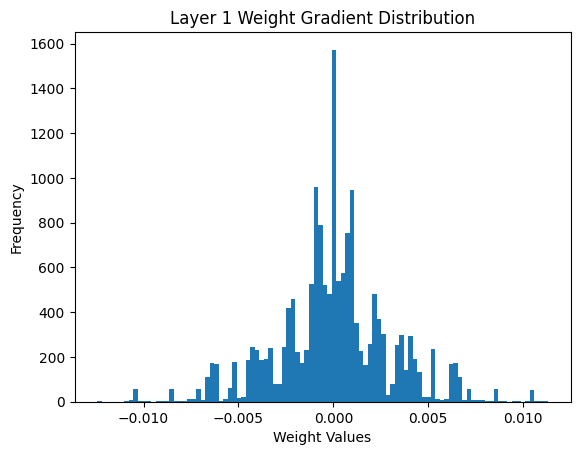

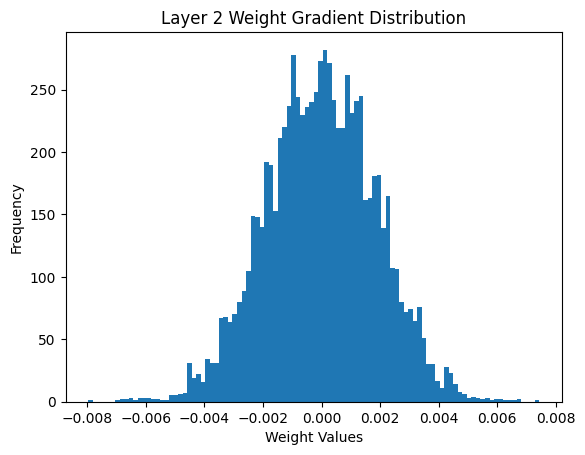

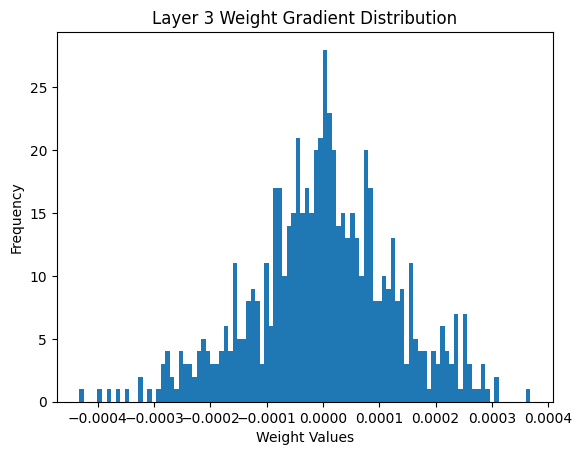

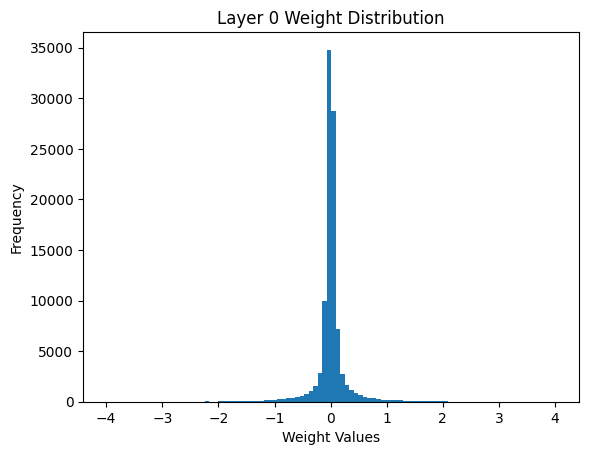

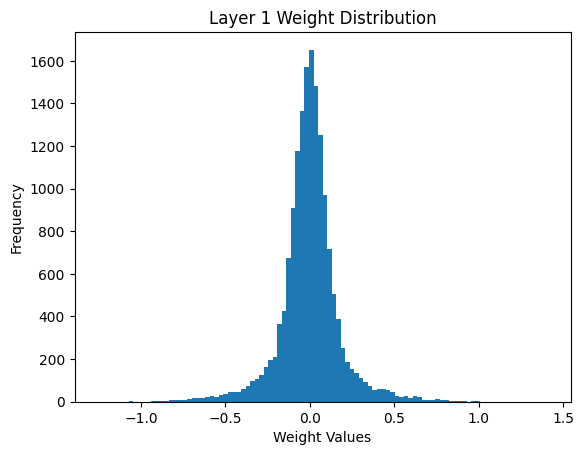

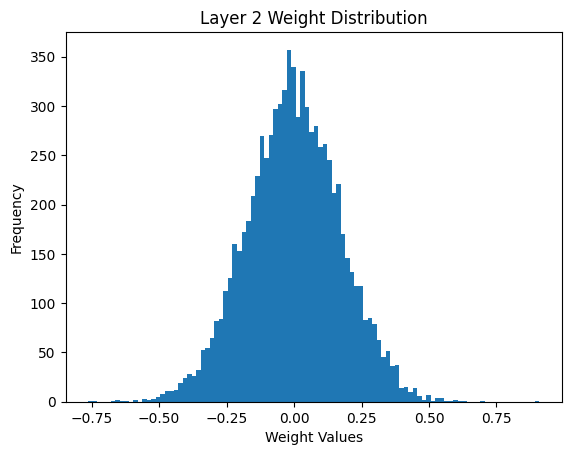

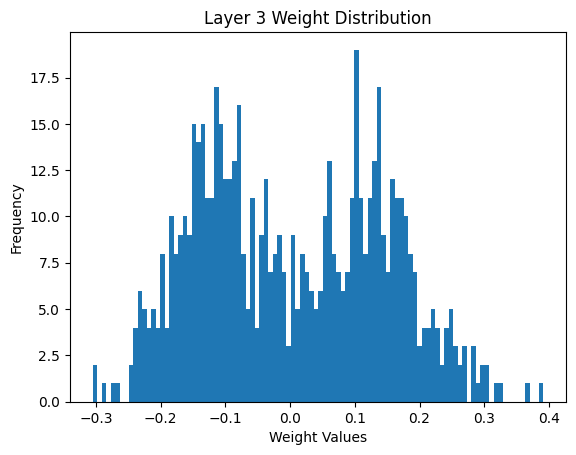

In [ ]:
tanh.plot_gradient_weight([0,1,2,3])
tanh.plot_weight([0,1,2,3])

## SeLU

In [ ]:
layer_size = [784, 64, 64, 64, 10]
activations = ["selu","selu","selu","softmax"]

selu = ffnn.FFNN(layer_sizes=layer_size, activations=activations, loss="mse", weight_initializer="normal", weight_init_args={"seed": 73})
plot_selu = selu.fit(X_train, y_train, 20, 0.1, 50, True, X_val, y_val)


Epoch 1/100, Loss: 0.3511, Val_loss: 0.1479
Epoch 2/100, Loss: 0.0970, Val_loss: 0.0966
Epoch 3/100, Loss: 0.0708, Val_loss: 0.0703
Epoch 4/100, Loss: 0.0628, Val_loss: 0.0644
Epoch 5/100, Loss: 0.0542, Val_loss: 0.0620
Epoch 6/100, Loss: 0.0498, Val_loss: 0.0642
Epoch 7/100, Loss: 0.0420, Val_loss: 0.0611
Epoch 8/100, Loss: 0.0417, Val_loss: 0.0562
Epoch 9/100, Loss: 0.0395, Val_loss: 0.0649
Epoch 10/100, Loss: 0.0368, Val_loss: 0.0628
Epoch 11/100, Loss: 0.0319, Val_loss: 0.0527
Epoch 12/100, Loss: 0.0321, Val_loss: 0.0576
Epoch 13/100, Loss: 0.0300, Val_loss: 0.0547
Epoch 14/100, Loss: 0.0296, Val_loss: 0.0538
Epoch 15/100, Loss: 0.0284, Val_loss: 0.0555
Epoch 16/100, Loss: 0.0290, Val_loss: 0.0509
Epoch 17/100, Loss: 0.0317, Val_loss: 0.0603
Epoch 18/100, Loss: 0.0339, Val_loss: 0.0854
Epoch 19/100, Loss: 0.0381, Val_loss: 0.0697
Epoch 20/100, Loss: 0.0307, Val_loss: 0.0479
Epoch 21/100, Loss: 0.0267, Val_loss: 0.0536
Epoch 22/100, Loss: 0.0277, Val_loss: 0.0586
Epoch 23/100, Loss:

KeyboardInterrupt: 

In [ ]:
y_pred = selu.predict(X_test)

y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_test_labels, y_pred_labels)
f1 = f1_score(y_test_labels, y_pred_labels, average="weighted")
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels))

In [ ]:
selu.plot_gradient_weight([0,1,2,3])
selu.plot_weight([0,1,2,3])

## Leaky

In [ ]:

layer_size = [784, 64, 64, 64, 10]
activations = ["leaky","leaky","leaky","softmax"]

leaky = ffnn.FFNN(layer_sizes=layer_size, activations=activations, loss="mse", weight_initializer="normal", weight_init_args={"seed": 73})
plot_leaky = leaky.fit(X_train, y_train, 20, 0.1, 50, True, X_val, y_val)


In [ ]:
y_pred = leaky.predict(X_test)

y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_test_labels, y_pred_labels)
f1 = f1_score(y_test_labels, y_pred_labels, average="weighted")
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels))

In [ ]:
leaky.plot_gradient_weight([0,1,2,3])
leaky.plot_weight([0,1,2,3])

In [ ]:
plot_training_results([plot_sigmoid,plot_relu,plot_linear,plot_tanh,plot_selu,plot_leaky])